# Kim1994
Test the Kim cross sections

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

In [2]:
# Allow LaTeX in the labels
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# Make labels slightly bigger
plt.rc('font', size=12)

In [3]:
from src.Kim1994 import Kim1994

## Oscillator strengths

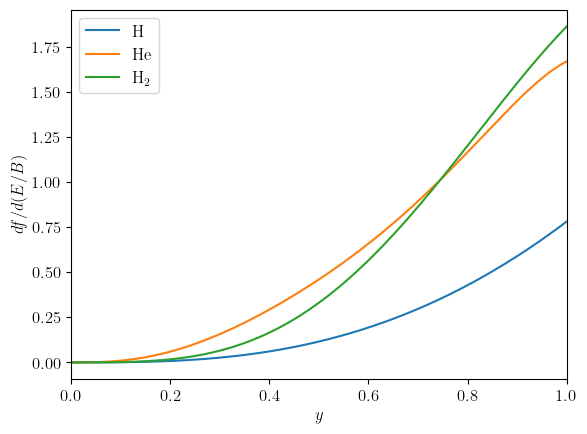

In [4]:
yArr = np.linspace(0, 1, 500)
T = 18e3
kH = Kim1994(T, "H")
kHe = Kim1994(T, "He")
kH2 = Kim1994(T, "H2")
plt.plot(yArr, kH.DiffOscillatorStrength(yArr), label="H")
plt.plot(yArr, kHe.DiffOscillatorStrength(yArr), label="He")
plt.plot(yArr, kH2.DiffOscillatorStrength(yArr), label=r"H$_2$")
plt.legend()
plt.xlabel(r"$y$")
plt.ylabel(r"$df/d(E/B)$")
plt.xlim(0, 1)
plt.show()

Plot the same expression but for $w$ and $df/dw$.

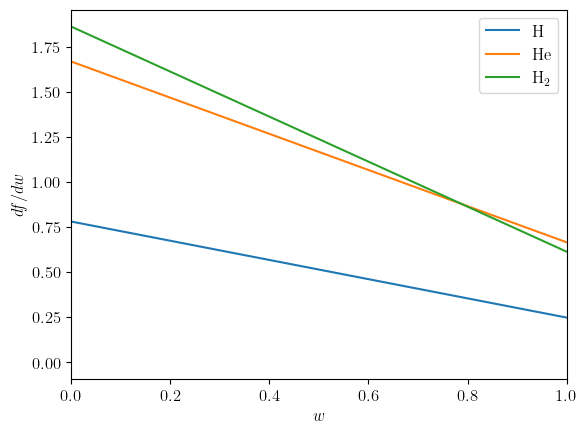

In [5]:
t = T / 13.6
wArr = np.linspace(0, (t-1) / 2, 500)
plt.plot(wArr, kH.DiffOscillatorStrength_w(wArr), label="H")
plt.plot(wArr, kHe.DiffOscillatorStrength_w(wArr), label="He")
plt.plot(wArr, kH2.DiffOscillatorStrength_w(wArr), label=r"H$_2$")
plt.legend()
plt.xlabel(r"$w$")
plt.ylabel(r"$df/dw$")
plt.xlim(0, 1)
plt.show()

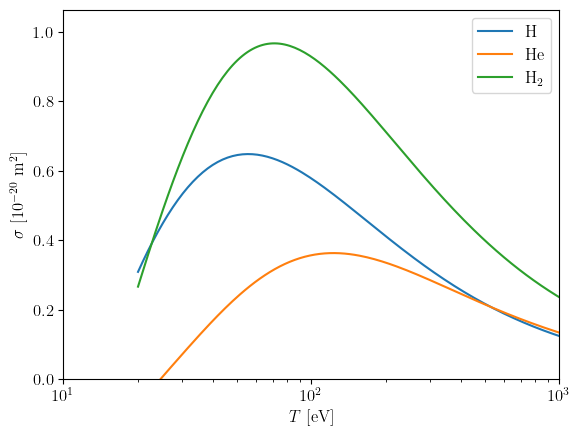

In [6]:
# Plot the total cross-sections
TArr = np.logspace(np.log10(20), np.log10(20e3), 300)
xsecHArr = np.zeros_like(TArr)
xsecHeArr = np.zeros_like(TArr)
xsecH2Arr = np.zeros_like(TArr)
for i, T in enumerate(TArr):
    kH = Kim1994(T, "H")
    kHe = Kim1994(T, "He")
    kH2 = Kim1994(T, "H2")
    xsecHArr[i] = kH.TotalXSec()
    xsecHeArr[i] = kHe.TotalXSec()
    xsecH2Arr[i] = kH2.TotalXSec()

plt.plot(TArr, xsecHArr * 1e20, label="H")
plt.plot(TArr, xsecHeArr * 1e20, label="He")
plt.plot(TArr, xsecH2Arr * 1e20, label=r"H$_2$")
plt.legend()
plt.xlabel(r"$T$ [eV]")
plt.ylabel(r"$\sigma$ [$10^{-20}$ m$^2$]")
plt.xlim(1e1, 1e3)
plt.ylim(0, np.max(xsecH2Arr * 1e20) * 1.1)
plt.xscale("log")
plt.show()

## Comparison with the Rudd 1991 model

In [7]:
from src.Rudd1991 import RuddXSec

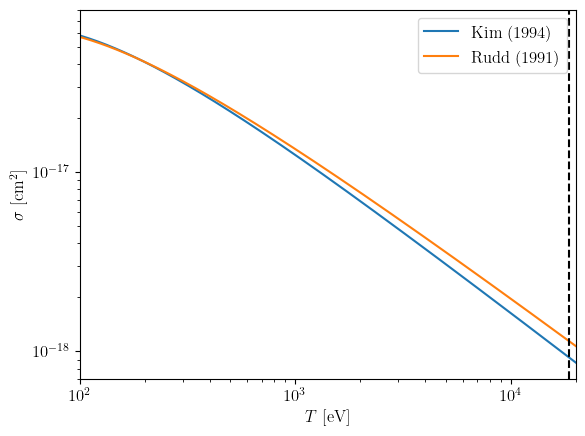

In [8]:
xsecHRuddArr = np.zeros_like(TArr)
for i, T in enumerate(TArr):
    ruddX = RuddXSec(T)
    xsecHRuddArr[i] = ruddX.TotalXSec()

plt.figure()
plt.loglog(TArr, xsecHArr * 1e4, label="Kim (1994)")
plt.loglog(TArr, xsecHRuddArr * 1e4, label="Rudd (1991)")
plt.xlabel(r"$T$ [eV]")
plt.ylabel(r"$\sigma$ [cm$^2$]")
plt.xlim(1e2, 20e3)
plt.legend()
# Draw a line at the endpoint energy
plt.axvline(18.575e3, color="black", linestyle="--")
plt.show()

## Plot of singly-differential cross section

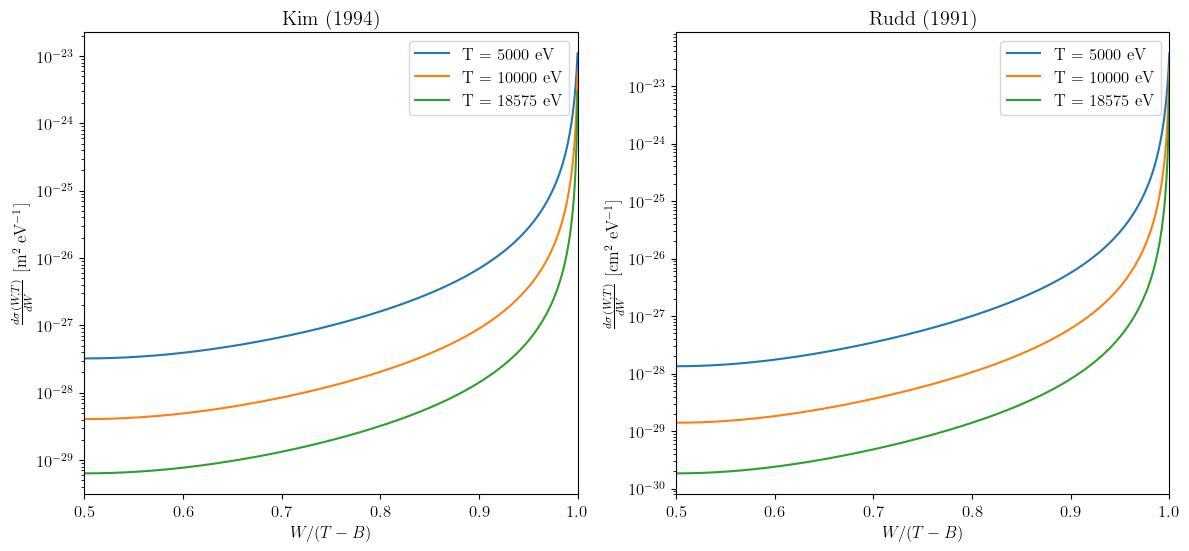

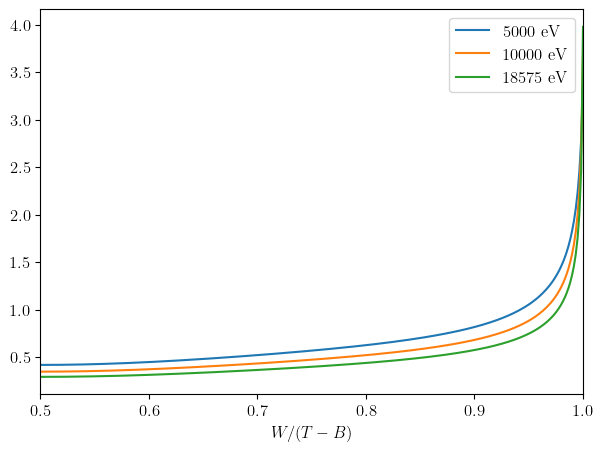

In [13]:
TValues = np.array([5e3, 10e3, 18.575e3])
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for T in TValues:
    kH = Kim1994(T, "H")
    WArr = np.linspace((T - 13.6) / 2, (T - 13.6), 500)
    plt.plot(WArr / (T - 13.6), kH.SingleDiffXSec_W(WArr), 
             label=f"T = {T:.0f} eV")

plt.legend()
plt.xlabel(r"$W / (T - B)$")
plt.ylabel(r"$\frac{d\sigma (W, T)}{dW}$ [m$^2$ eV$^{-1}$]")
plt.yscale("log")
plt.title("Kim (1994)")
plt.xlim(0.5, 1)

# Do the same plot for the Rudd cross-section
plt.subplot(1, 2, 2)
for T in TValues:
    ruddX = RuddXSec(T)
    WArr = np.linspace((T - 13.6) / 2, (T - 13.6), 500)
    plt.plot(WArr / (T - 13.6), ruddX.SinglyDifferentialXSec_W(WArr), 
             label=f"T = {T:.0f} eV")

plt.legend()
plt.xlabel(r"$W / (T - B)$")
plt.ylabel(r"$\frac{d\sigma (W, T)}{dW}$ [cm$^2$ eV$^{-1}$]")
plt.yscale("log")
plt.xlim(0.5, 1)
plt.title("Rudd (1991)")
plt.show()

plt.figure(figsize=(7, 5))
for iFig, T in enumerate(TValues):
    ruddX = RuddXSec(T)
    kimX = Kim1994(T, "H")
    WArr = np.linspace((T - 13.6) / 2, (T - 13.6), 300)
    SDCSArr_Rudd = ruddX.SinglyDifferentialXSec_W(WArr)
    SDCSArr_Kim = kimX.SingleDiffXSec_W(WArr)
    plt.plot(WArr / (T - 13.6), SDCSArr_Rudd / SDCSArr_Kim, 
             label=f"{T:.0f} eV")
    plt.xlabel(r"$W / (T - B)$")
    
plt.xlim(0.5, 1)
plt.legend()
plt.show()